# This notebook will explore the Scikit-learn python package
[Scikit-learn Website](https://scikit-learn.org/stable/index.html)

## Regression Analysis using Scikit-Learn
What is regression? Regression is very important in the areas of machine learning and statistics. Many forms of regression exist with Linear regression being one of them. Regression uses particular methods to estimate the relationship between a dependant variable (known as the outcome or response variable) and one or more independent variables often referred to as 'predictors'.<br>
### Linear regression applied to the 'Concrete Compressive Strength Data Set' [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)
Background: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

#### Step 1: Import and view the data

In [1]:
# The following analysis uses the input variables of cement dataset to attempt to predict the compressive strength of the concrete
import numpy as np
import pandas as pd
# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set plotting parameters
plt.rcParams["figure.figsize"] = (12,8)
# set seaborn theme
sns.set()

In [3]:
# next import the dataset from local directory. 
# note: dataset downloaded from UCI machine learning repository @ https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
concrete_csv = 'Concrete_Data.csv'
# import using pandas
df_concrete = pd.read_csv(concrete_csv)

In [4]:
# Take a look at the top 5 lines of the imported dataframe
df_concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# list the column names
df_concrete.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

The column names above are a bit verbose. They can be renamed to make the dataset tidier.

In [6]:
df_concrete.columns = ['cement','blast_furnace_slag','fly_ash','water','superplasticizer','coarse_aggregate','fine_aggregate','age','compressive_strength']

In [7]:
# review the change
df_concrete.head(1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


In [8]:
# get information of the various datatypes in the dataset
df_concrete.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cement                1030 non-null   float64
 1   blast_furnace_slag    1030 non-null   float64
 2   fly_ash               1030 non-null   float64
 3   water                 1030 non-null   float64
 4   superplasticizer      1030 non-null   float64
 5   coarse_aggregate      1030 non-null   float64
 6   fine_aggregate        1030 non-null   float64
 7   age                   1030 non-null   int64  
 8   compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
# print number of rows and columns
nRows, nColumns = df_concrete.shape
print(f'There are {nRows} rows and {nColumns} columns in the dataset')

There are 1030 rows and 9 columns in the dataset


In [10]:
# get some general statistics of the dataset using describe()
df_concrete.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [11]:
# check for null values
df_concrete.isnull().sum()

cement                  0
blast_furnace_slag      0
fly_ash                 0
water                   0
superplasticizer        0
coarse_aggregate        0
fine_aggregate          0
age                     0
compressive_strength    0
dtype: int64

#### Step 2: Data Visualisation

<AxesSubplot:xlabel='compressive_strength', ylabel='Count'>

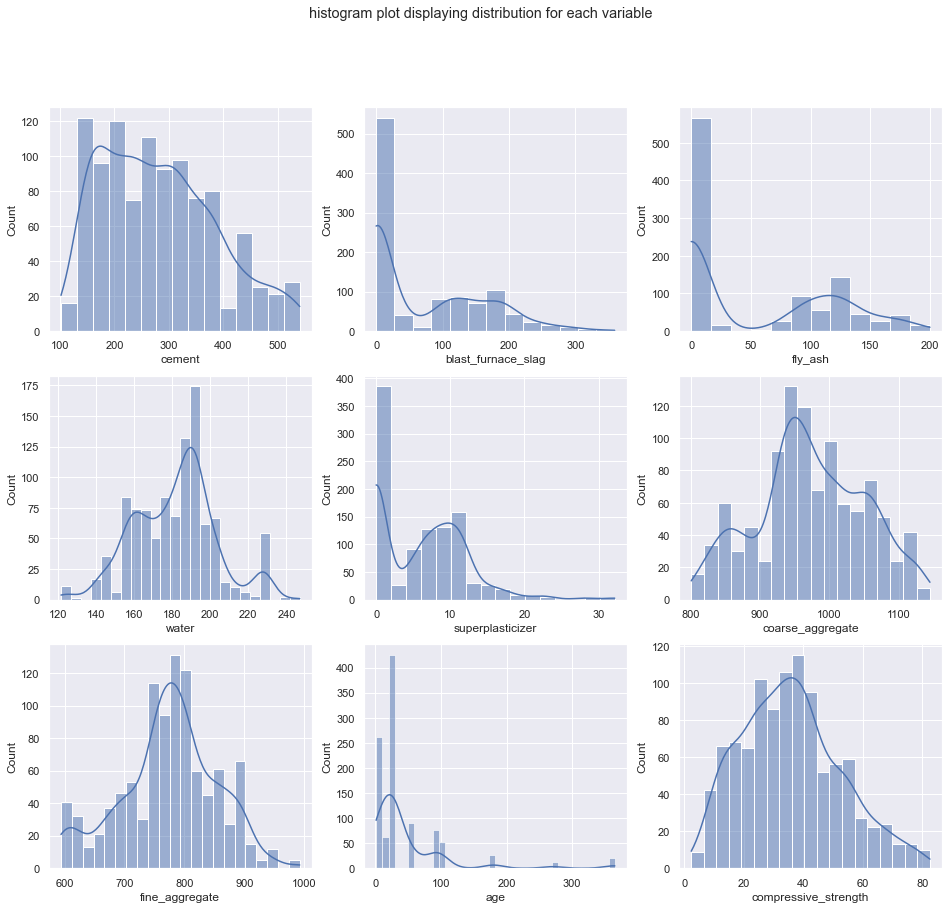

In [12]:
# create a matplot lib 3 x 3 grid
fig, axes = plt.subplots(3, 3, figsize=(16,14))
fig.suptitle('histogram plot displaying distribution for each variable')

# Plot each column to one of the sections of the grid
sns.histplot(data=df_concrete,x='cement',kde=True,ax=axes[0,0])
sns.histplot(data=df_concrete,x='blast_furnace_slag',kde=True,ax=axes[0,1])
sns.histplot(data=df_concrete,x='fly_ash',kde=True,ax=axes[0,2])
sns.histplot(data=df_concrete,x='water',kde=True,ax=axes[1,0])
sns.histplot(data=df_concrete,x='superplasticizer',kde=True,ax=axes[1,1])
sns.histplot(data=df_concrete,x='coarse_aggregate',kde=True,ax=axes[1,2])
sns.histplot(data=df_concrete,x='fine_aggregate',kde=True,ax=axes[2,0])
sns.histplot(data=df_concrete,x='age',kde=True,ax=axes[2,1])
sns.histplot(data=df_concrete,x='compressive_strength',kde=True,ax=axes[2,2])

<AxesSubplot:ylabel='compressive_strength'>

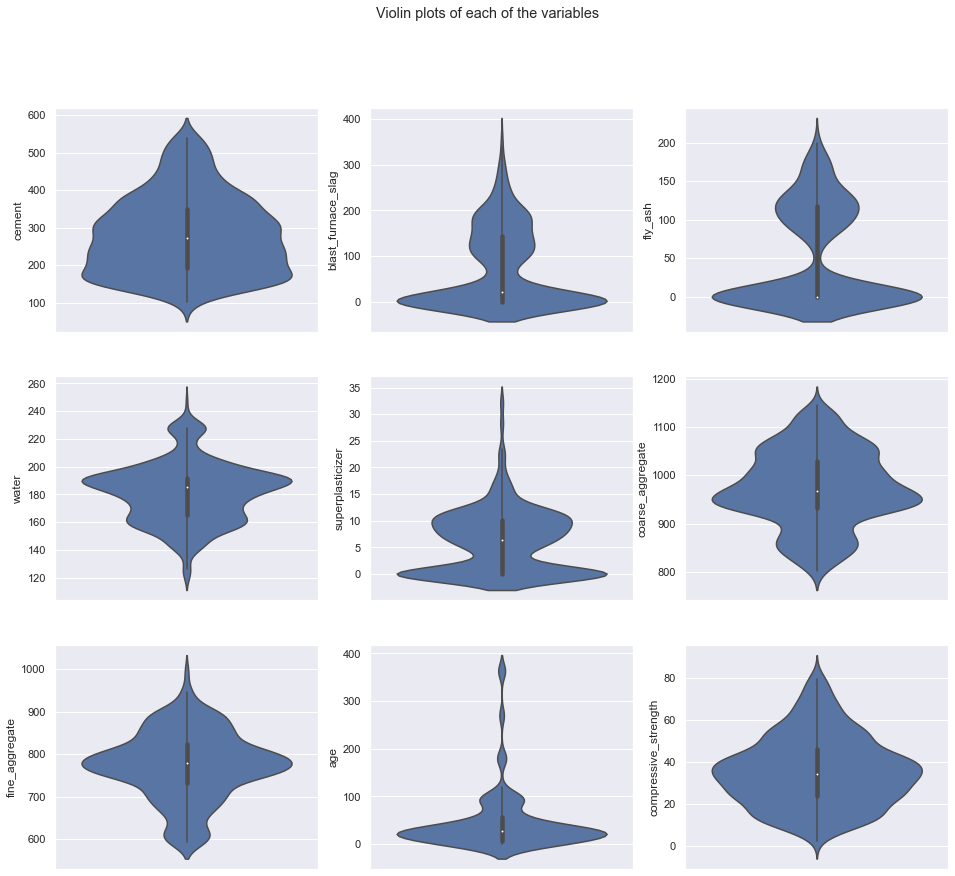

In [13]:
# create a matplot lib 3 x 3 grid to plot violin plot for each variable
fig, axes = plt.subplots(3, 3, figsize=(16,14))
fig.suptitle('Violin plots of each of the variables')

sns.violinplot(data=df_concrete,y='cement',ax=axes[0,0])
sns.violinplot(data=df_concrete,y='blast_furnace_slag',ax=axes[0,1])
sns.violinplot(data=df_concrete,y='fly_ash',ax=axes[0,2])
sns.violinplot(data=df_concrete,y='water',ax=axes[1,0])
sns.violinplot(data=df_concrete,y='superplasticizer',ax=axes[1,1])
sns.violinplot(data=df_concrete,y='coarse_aggregate',ax=axes[1,2])
sns.violinplot(data=df_concrete,y='fine_aggregate',ax=axes[2,0])
sns.violinplot(data=df_concrete,y='age',ax=axes[2,1])
sns.violinplot(data=df_concrete,y='compressive_strength',ax=axes[2,2])

Calculate the correlation between each of the variables

<AxesSubplot:>

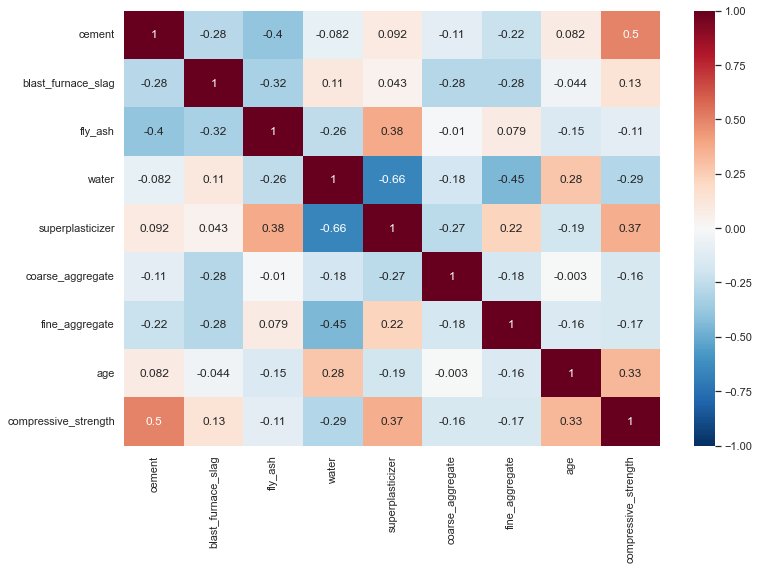

In [14]:
# plot the correlation of each variable to "quality"
correlation = df_concrete.corr()
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [15]:
# list the variables in descending according to their correlation to compressive_strength
correlation['compressive_strength'].sort_values(ascending=False)

compressive_strength    1.000000
cement                  0.497832
superplasticizer        0.366079
age                     0.328873
blast_furnace_slag      0.134829
fly_ash                -0.105755
coarse_aggregate       -0.164935
fine_aggregate         -0.167241
water                  -0.289633
Name: compressive_strength, dtype: float64

The top 3 variables with a positive correlation to compressive strength of the concrete are Cement content, Superplastisizer content and age of the concrete.
<br>
#### Step 3. Regression Analysis
The data needs to be standardised due to different scales for different variables.

In [16]:
# import standardscaler to normalize the dataset
from sklearn.preprocessing import StandardScaler

In [22]:
# Split the dataset into X (predictors) and y (response variable - compressive_strength)
X = df_concrete.drop(['compressive_strength'], axis=1)
y = df_concrete['compressive_strength']
print(type(y))

<class 'pandas.core.series.Series'>


In [23]:
# import train test split from SK learn to train the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=123)

In [24]:
# import linear regression from sklearn
from sklearn.linear_model import LinearRegression

# perform regression with train set
reg = LinearRegression().fit(X_train, y_train)

In [26]:
#
reg.score(X_test, y_test)

0.6048984440343427

In [27]:
reg.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

### Classification Analysis using Scikit-Learn
What is classification?
From [here](https://machinelearningmastery.com/types-of-classification-in-machine-learning/#:~:text=In%20machine%20learning%2C%20classification%20refers,it%20is%20spam%20or%20not.), classification refers to a predictive modeling method used in machine learning where a class label is predicted for a given example of input data.<br>In order to train the algorithm in classification, a dataset with lots of examples of inputs and outputs is required.
<br>The algorithm will make use of the training dataset to construct a suitable connection between input data and specific class labels. The training dataset must accurately represent the problem and have many examples of each class.

### Red Wine Quality
This classification analysis will be performed on red wine quality using a dataset from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/wine+quality). <br>
The dataset relates to the red variant the Portugese "Vinho Verde" wine. 
* Input Variables
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
Output variable (based on sensory data):
12. quality (score between 0 and 10)


In [ ]:
# import libraries
import numpy as np
import pandas as pd
# libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,6)

In [ ]:
# read in the dataset
df_wine = pd.read_csv("winequality-red.csv", sep=";")

In [ ]:
# View the shape of the dataset
print(f"Rows, columns {df_wine.shape}")
# View the top 5 rows of the dataset
df_wine.head()

The dataset contains 1599 rows and 12 columns

In [ ]:
# print a summary of the dataset using pd.info
df_wine.info(verbose=True)

All the input values (0-11) are of type float64 with the output (quality) of type int64

In [ ]:
# View descriptive statistics of the dataset using describe()
df_wine.describe()

From the table above, the output attribute quality has a minimum of 3 and a maximum of 8 this is good to know for future.

In [ ]:
# the dataset looks very clean. 
df_wine.isna().sum()

There are no missing values

In [ ]:
# check the unique values of the attribute "quality"
df_wine["quality"].unique()

In [ ]:
# next check how the data is distributed across these values
df_wine.quality.value_counts().sort_index()

## Exploring the data

In [ ]:
# plot the output variable "quality"\
sns.countplot(data=df_wine, x="quality", )

The above distribution confirms the previous observation that the range for output variable is between 3 and 8.

In [ ]:
# plot the correlation of each variable to "quality"
correlation = df_wine.corr()
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [ ]:
correlation['quality'].sort_values(ascending=False)

* The variables which have a positive correlation on the output quality of wine in order of highest correlation are *alcohol, sulphates, citric acid, fixed acidity, residual sugar*. These are the variables that will be explored more in depth.
* The rest of the variables have a negative correlation.

### Classification
As this is a classification example using scikit-learn, a new discreet response variable 'rating' will be created from the quality variable. This will be calculated as follows.
<br> bad = 1-4
<br> average = 5-6
<br> good = 7-10

In [ ]:
# the conditions can be set using np.select() https://numpy.org/doc/stable/reference/generated/numpy.select.html
rating_conditions = [
    (df_wine['quality'] >= 7),
    (df_wine['quality'] <= 4),
    (df_wine['quality'] > 4) & (df_wine['quality'] < 7)
]
rating = ['good', 'bad', 'average']
df_wine['rating'] = np.select(rating_conditions, rating)
df_wine.rating.value_counts()

### Using Groupby()
(from the lecture notebook [Iris Classification](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/main/iris-classification.ipynb))<br>
Choosing the 2 variables with the highest correlation 'alcohol' and 'sulphates'

In [ ]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for rating, data in df_wine.groupby('rating'):
    ax.scatter(data['alcohol'], data['sulphates'], label=rating)

# Show the legend.
ax.set_xlabel('Alcohol Content')
ax.set_ylabel('Sulphate Content')
ax.legend();

#### Make a new dataframe with 4 most relevant variables and output

In [ ]:
df_new = df_wine[['alcohol', 'sulphates', 'citric acid', 'fixed acidity', 'residual sugar', 'rating']]
df_new

#### Seaborn Pairplot()

In [ ]:
sns.pairplot(df_new, hue='rating')

#### Since alcohol has the highest correlation to quality this will be plotted first

In [ ]:
# plot using seaborn box plot for categorical plot
ax = sns.boxplot(data=df_wine, x='quality', y='alcohol')
ax.set(xlabel='Wine Quality', ylabel='Alcohol %', title='Alcohol % vs Wine quality')

* There is a very apparent relationship between alcohol content and the quality of the wine. As the alcohol content increases so does the quality of the wine.<br>
### Classification

In [ ]:
# import libraries
# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Module to split the data
from sklearn.model_selection import train_test_split

# Normalise feature variables
from sklearn.preprocessing import StandardScaler

#### The data needs to be standardised due to different scales for different variables.

In [ ]:
# Separate feature variables and target variable
X = df_new.drop(['rating'], axis = 1)
y = df_new['rating']

In [ ]:
X_features = X
X = StandardScaler().fit_transform(X)

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

#### Logistic Regression

In [ ]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(X_train,y_train)

In [ ]:
# Ask the classifier to classify the test data.
predictions = lre.predict(X_test)
predictions

In [ ]:
# Quick overview of the the misclassifications.
(predictions == y_test).value_counts()

In [ ]:
# What portion of predictions were correct
lre.score(X_test, y_test)

#### k Nearest Neighbors

In [ ]:
# New Classifier.
knn = nei.KNeighborsClassifier()

In [ ]:
# fit the model
knn.fit(X_train, y_train)

In [ ]:
# Test.
knn.score(X_test, y_test)

In [ ]:
# Predict
k_predictions = knn.predict(X_test)
k_predictions

In [ ]:
print(f"Number of correct and incorrect predictions\n{(k_predictions == y_test).value_counts()}")
print(f"\nNumber of correct and incorrect predictions displayed in decimal\n{(k_predictions == y_test).value_counts(normalize=True)}")

***
### Exploring a machine learning tutorial

[Hosted here](https://www.dataquest.io/blog/sci-kit-learn-tutorial/)
This tutorial explores the sales_win_loss data set from IBM's Watson repository

In [ ]:
# Matplotlib magic command for plotting
%matplotlib inline 

#import pandas package to explore the data 
import pandas as pd


In [ ]:
# Load the data using pandas.read_csv()
sales_data = pd.read_csv("https://raw.githubusercontent.com/vkrit/data-science-class/master/WA_Fn-UseC_-Sales-Win-Loss.csv")

<br>**Review the data using head function**

In [ ]:
# View the first few records of the data set
sales_data.head()

In [ ]:
# View the last few rows from the dataframe using .tail() function
sales_data.tail()

<br>**View the various data types of the data set using pd.dtypes(). This could come in handy at a later stage if data needs to be manipulated or converted**

In [ ]:
sales_data.dtypes

## Visualising the Data
Seaborn is an excellent package to use for plotting data. This must be imported along with Matplotlib.

In [ ]:
# import seaborn for plotting
import seaborn as sns

# import matplotlib for plotting
import matplotlib.pyplot as plt

# setting the plot size and backgroud to white for all plots
# sns.set updated to sns.set_theme https://seaborn.pydata.org/generated/seaborn.set.html
sns.set_theme(style='whitegrid', rc={'figure.figsize':(12,8.5)})

# create a countplot
sns.countplot(x="Route To Market", data=sales_data, hue ="Opportunity Result")

# Remove the top and down margin
sns.despine(trim=True)

# display the plot
plt.show()

## Preprocessing Data
Before building prediction models using scikit-learn some of the data must be processed from string values into numerical values as this is how scikit-learn operates best. Scikit-learn offers a method LabelEncoder() which converts string data into numerical data which will be used here.
<br><br>First let's take a look at some of the string values contained in the columns

In [ ]:
print("Supplies Subgroup' : ",sales_data['Supplies Subgroup'].unique())
print("Region : ",sales_data['Region'].unique())
print("Route To Market : ",sales_data['Route To Market'].unique())
print("Opportunity Result : ",sales_data['Opportunity Result'].unique())
print("Competitor Type : ",sales_data['Competitor Type'].unique())
print("'Supplies Group : ",sales_data['Supplies Group'].unique())

<br>The unique values for for the different categorical columns have been identified above. Next step is to encode these as numbers using the following code

In [ ]:
#import the preprocessing module from sklean
from sklearn import preprocessing

# create the Labelencoder() object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

#display the initial records
sales_data.head()

Now that the data is prepared and converted it is almost ready to be used for building the predictive model. The final critical step is 
### Training Set & Test Set
The algorithm must be trained on a set of data so it can learn the specific relationships in the data. For this the data set will be split in two 

In [ ]:
# select columns other than 'Opportunity Number','Opportunity Result'
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
# dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = sales_data[cols]
#assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']
data.head(n=2)

The above code removed the Opportunity Number as this was just a unique identifier for each opportunity. Opportunity result is what we want to predict so this was also removed from the data set.  
<br>
Next it's time to train and test the dataset

In [ ]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

### Naive-Bayes
On a very high level a Naive-Bayes algorithm calculates the probability of the connection of a feature with a target variable and then it selects the feature with the highest probability.

In [ ]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

### Linear SVC
On a very basic level LinearSVC tries to divide the data into different planes so that it can find a best possible grouping of different classes.

In [ ]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

### K-Neighbors Classifier
Explanation to follow [Wiki K-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [ ]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))